In [96]:
from operator import eq
import pandas as pd
import pandas_ta as ta
import matplotlib
import matplotlib.pyplot as plt
import yfinance as yf

## IMPORT SKLEARN
from sklearn import tree
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, TimeSeriesSplit, cross_val_score, GridSearchCV

from xgboost import XGBClassifier, plot_importance, Booster, plot_tree, to_graphviz, DMatrix

import numpy as np

# IMPORT TENSORFLOW AND KERAS
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM
#from tensorflow.keras.optimizers import Adam, RMSprop 
#from tensorflow.keras.utils import plot_model
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame()

In [ ]:
#df = df.ta.ticker("^FVX")
#df.to_csv('./StockDataCSV/5YUST_StockData.csv')

#names = yf.Tickers('^FVX ^TNX CL=F DX-Y.NYB GC=F ^GSPC BTC-USD')

#data = yf.download('^FVX ^TNX CL=F DX-Y.NYB GC=F ^GSPC BTC-USD', start="2017-08-01",end="2022-07-31")

In [2]:
data.to_excel('StockDataCSV/EquityDataExcel.xlsx')
data

NameError: name 'data' is not defined

In [3]:
equityData = pd.read_excel('StockDataCSV/EquityDataExcel.xlsx', sheet_name='Sheet1', index_col=0, usecols=[0,1,2,3,4,5,6,7], engine='openpyxl')
equityData.dropna(inplace=True)
equityData.columns = ['BTCUSD', 'BrentCrude', 'DollarIDX', 'Gold', 'UST5Y', 'SNP500', 'UST10Y']
equityData.drop(index=equityData.index[0], axis=0, inplace=True)
equityData.head()

,BTCUSD,BrentCrude,DollarIDX,Gold,UST5Y,SNP500,UST10Y
2017-07-31 00:00:00,2875.34,50.17,92.86,1266.6,1.832,2470.3,2.292
2017-08-01 00:00:00,2718.26,49.16,93.03,1272.6,1.799,2476.35,2.251
2017-08-02 00:00:00,2710.67,49.59,92.83,1271.8,1.819,2477.57,2.262
2017-08-03 00:00:00,2804.73,49.03,92.81,1267.8,1.79,2472.16,2.228
2017-08-04 00:00:00,2895.89,49.58,93.54,1258.3,1.822,2476.83,2.267


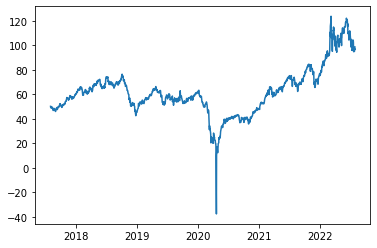

In [4]:
# equityData.plot(x = equityData['UST5Y'], y = equityData['BrentCrude'])
# plt.plot(x = equityData['Date'], y = equityData['BrentCrude'])
plt.plot(equityData['BrentCrude'])
plt.show()

In [5]:
x = equityData.diff(-1)
x.dropna(inplace=True)
x

,BTCUSD,BrentCrude,DollarIDX,Gold,UST5Y,SNP500,UST10Y
2017-07-31,157.08,1.01,-0.169998,-6,0.033,-6.05005,0.0410001
2017-08-01,7.59009,-0.43,0.199997,0.799927,-0.02,-1.21997,-0.0110002
2017-08-02,-94.0601,0.560001,0.0200043,4,0.029,5.41016,0.0340002
2017-08-03,-91.1599,-0.550003,-0.730003,9.5,-0.0320001,-4.67017,-0.039
2017-08-04,-483.05,0.190002,0.110001,0.100098,0.00999999,-4.07983,0.00999999
...,...,...,...,...,...,...,...
2022-07-22,1353.28,-2,0.25,8.09998,-0.0270002,-5.21021,-0.0369999
2022-07-25,121.947,1.71999,-0.709999,1.30005,0.0150001,45.79,0.033
2022-07-26,-1690.79,-2.28,0.740005,-1.40002,0.0880001,-102.56,0.053
2022-07-27,-913.338,0.840004,0.0999985,-31.2001,0.0939999,-48.8198,0.053


In [6]:
Y = np.where(x['BTCUSD'] < 0, 0, 1)
Y = np.delete(Y, (0), axis=0)
Y = np.append(Y, [0], axis=0)
Y.shape

(1257,)

In [7]:
X = x.drop('BTCUSD', axis=1)
X

,BrentCrude,DollarIDX,Gold,UST5Y,SNP500,UST10Y
2017-07-31,1.01,-0.169998,-6,0.033,-6.05005,0.0410001
2017-08-01,-0.43,0.199997,0.799927,-0.02,-1.21997,-0.0110002
2017-08-02,0.560001,0.0200043,4,0.029,5.41016,0.0340002
2017-08-03,-0.550003,-0.730003,9.5,-0.0320001,-4.67017,-0.039
2017-08-04,0.190002,0.110001,0.100098,0.00999999,-4.07983,0.00999999
...,...,...,...,...,...,...
2022-07-22,-2,0.25,8.09998,-0.0270002,-5.21021,-0.0369999
2022-07-25,1.71999,-0.709999,1.30005,0.0150001,45.79,0.033
2022-07-26,-2.28,0.740005,-1.40002,0.0880001,-102.56,0.053
2022-07-27,0.840004,0.0999985,-31.2001,0.0939999,-48.8198,0.053


In [8]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

# Linear Regression
reg = LogisticRegression(random_state=0).fit(X_train, y_train)
reg.score(X_train,y_train)

0.540386803185438

In [9]:
reg.score(X_test, y_test)

0.5105820105820106

In [10]:
y_pred = reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.80      0.62       188
           1       0.53      0.22      0.31       190

    accuracy                           0.51       378
   macro avg       0.52      0.51      0.47       378
weighted avg       0.52      0.51      0.47       378



In [11]:
myStrategy = ta.Strategy(
name='Blokkere CryptoBot 101',
ta=[
    {"kind": "sma", "length": 50},
    {"kind": "sma", "length": 200},
    {"kind": "bbands", "length": 20},
    {"kind": "rsi"},
    {"kind": "macd", "fast": 8, "slow": 21},
    {"kind": "fwma"},
])

In [12]:
Gold = pd.read_excel('StockDataCSV/EquityDataExcel.xlsx', sheet_name='Sheet1', index_col=0, usecols=[0,4,11,18,25,32,39], engine='openpyxl')
Gold.dropna(inplace=True)
Gold.columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
Gold.drop(index=Gold.index[0], axis=0, inplace=True)
Gold.head()

,Adj Close,Close,High,Low,Open,Volume
2017-07-31 00:00:00,1266.6,1266.6,1270.8,1265.8,1268.9,7780
2017-08-01 00:00:00,1272.6,1272.6,1273.3,1262,1268.4,1061
2017-08-02 00:00:00,1271.8,1271.8,1272.1,1262.9,1268.5,393
2017-08-03 00:00:00,1267.8,1267.8,1269.8,1256.6,1265.9,878
2017-08-04 00:00:00,1258.3,1258.3,1269.6,1253.9,1269,521


In [13]:
Gold.ta.strategy(myStrategy)
Gold

,Adj Close,Close,High,Low,Open,Volume,SMA_50,SMA_200,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,RSI_14,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9,FWMA_10
2017-07-31,1266.6,1266.6,1270.8,1265.8,1268.9,7780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1272.6,1272.6,1273.3,1262,1268.4,1061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-02,1271.8,1271.8,1272.1,1262.9,1268.5,393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-03,1267.8,1267.8,1269.8,1256.6,1265.9,878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-04,1258.3,1258.3,1269.6,1253.9,1269,521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,1719,1719,1732,1719,1727,67,1800.676001,1840.086995,1663.289853,1745.109998,1826.930142,9.377076,0.340443,36.333988,-26.584519,5.363927,-31.948446,1716.967119
2022-07-26,1717.7,1717.7,1718,1717.7,1718,1,1798.553999,1839.893994,1665.187236,1739.949994,1814.712752,8.593667,0.351196,35.998921,-24.296071,6.121900,-30.417971,1717.278294
2022-07-27,1719.1,1719.1,1719.1,1719.1,1719.1,144865,1796.787998,1839.716494,1668.872693,1735.029993,1801.187292,7.626070,0.379605,36.676167,-22.003304,6.731733,-28.735038,1717.888085
2022-07-28,1750.3,1750.3,1755,1732,1732.3,37236,1795.523999,1839.676494,1675.775817,1731.859998,1787.944178,6.476757,0.664396,49.500880,-15.840666,10.315498,-26.156163,1730.384618


In [14]:
names =['BTCUSD','Crude','DXY','Gold','UST5Y','SnP500','UST10Y']

In [15]:
diffStr = {}
for i in range(0,7):
    diffStr[i] = pd.read_excel('StockDataCSV/EquityDataExcel.xlsx', sheet_name='Sheet1', index_col=0, usecols=[0,i+1,i+8,i+15,i+22,i+29,i+36], engine='openpyxl')
    diffStr[i].dropna(inplace=True)
    diffStr[i].columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
    diffStr[i].drop(index=diffStr[i].index[0], axis=0, inplace=True)

In [16]:
for i in range(0,7):
    diffStr[i].ta.strategy(myStrategy)
    diffStr[i].drop(diffStr[i].columns[[0, 1, 2,3,4,5]], axis=1, inplace=True)
    
    for j in range(0,len(diffStr[i].columns)):
        diffStr[i].rename(columns= { diffStr[i].columns[j] :  (diffStr[i].columns[j] + '_'+names[i])},inplace=True)
        

In [17]:
diffStr[0]

btcdata = pd.read_excel('StockDataCSV/EquityDataExcel.xlsx', sheet_name='Sheet1', index_col=0, usecols=[0,1], engine='openpyxl')
btcdata.drop(index=btcdata.index[0], axis=0, inplace=True)
btcdata = btcdata.diff(-1)

In [18]:
frames = [btcdata, diffStr[1], diffStr[2],diffStr[3],diffStr[4],diffStr[5],diffStr[6] ]
res = pd.concat(frames,axis=1)

res

,Adj Close,SMA_50_Crude,SMA_200_Crude,BBL_20_2.0_Crude,BBM_20_2.0_Crude,BBU_20_2.0_Crude,BBB_20_2.0_Crude,BBP_20_2.0_Crude,RSI_14_Crude,MACD_8_21_9_Crude,...,BBL_20_2.0_UST10Y,BBM_20_2.0_UST10Y,BBU_20_2.0_UST10Y,BBB_20_2.0_UST10Y,BBP_20_2.0_UST10Y,RSI_14_UST10Y,MACD_8_21_9_UST10Y,MACDh_8_21_9_UST10Y,MACDs_8_21_9_UST10Y,FWMA_10_UST10Y
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-31 00:00:00,157.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01 00:00:00,7.59009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-02 00:00:00,-94.0601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-03 00:00:00,-91.1599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-26 00:00:00,-1690.79,108.8526,94.44595,90.899522,101.1345,111.369477,20.240329,0.19934,39.130737,-3.563435,...,2.739349,2.95245,3.165551,14.435563,0.111804,40.259634,-0.071562,-0.024916,-0.046646,2.835140
2022-07-27 00:00:00,-913.338,108.5138,94.52905,91.294986,100.4095,109.524013,18.154683,0.327226,42.882548,-3.297519,...,2.729173,2.92885,3.128527,13.635183,0.012087,38.029298,-0.084106,-0.029968,-0.054138,2.796182
2022-07-28 00:00:00,39.2539,108.1942,94.60895,91.561559,99.7415,107.921441,16.402282,0.296973,41.858874,-3.153185,...,2.695952,2.90825,3.120548,14.599694,-0.0352151,35.888199,-0.098236,-0.035278,-0.062957,2.751385
2022-07-29 00:00:00,148.426,107.9748,94.69550,91.676795,99.3845,107.092205,15.510879,0.450407,45.526567,-2.698540,...,2.652279,2.89175,3.131221,16.562359,-0.0214619,34.355392,-0.111363,-0.038725,-0.072638,2.708846


In [99]:
res.dropna(inplace=True)
res
res.to_excel('StockDataCSV/CleanedDataRES.xlsx')

In [20]:

ModelY = np.where(res['Adj Close'] < 0, 0, 1)
ModelY = np.delete(ModelY, (0), axis=0)
ModelY = np.append(ModelY, [0], axis=0)
ModelY.shape

(1059,)

In [21]:
ModelX = res.drop('Adj Close', axis=1)
ModelX

,SMA_50_Crude,SMA_200_Crude,BBL_20_2.0_Crude,BBM_20_2.0_Crude,BBU_20_2.0_Crude,BBB_20_2.0_Crude,BBP_20_2.0_Crude,RSI_14_Crude,MACD_8_21_9_Crude,MACDh_8_21_9_Crude,...,BBL_20_2.0_UST10Y,BBM_20_2.0_UST10Y,BBU_20_2.0_UST10Y,BBB_20_2.0_UST10Y,BBP_20_2.0_UST10Y,RSI_14_UST10Y,MACD_8_21_9_UST10Y,MACDh_8_21_9_UST10Y,MACDs_8_21_9_UST10Y,FWMA_10_UST10Y
2018-05-16,66.0742,58.28130,66.474198,69.300000,72.125802,8.155273,0.8875,64.990250,1.470675,0.081642,...,2.892832,2.97965,3.066468,5.827371,1.16432,70.780857,0.050962,0.012122,0.038839,3.048587
2018-05-17,66.2810,58.39295,66.520959,69.459999,72.399039,8.462540,0.845351,64.990250,1.439852,0.040656,...,2.891210,2.98940,3.087590,6.569236,1.10902,71.918409,0.058120,0.015424,0.042695,3.072077
2018-05-18,66.5042,58.50140,66.607825,69.605000,72.602174,8.611952,0.77943,63.472487,1.361395,-0.030241,...,2.893140,2.99520,3.097260,6.814898,0.851754,63.883170,0.056492,0.011037,0.045455,3.070496
2018-05-21,66.7082,58.61745,66.613903,69.784999,72.956096,9.088189,0.88709,67.239090,1.404478,0.010274,...,2.893935,2.99980,3.105665,7.058147,0.807939,63.519257,0.053937,0.006786,0.047151,3.068671
2018-05-22,66.9236,58.73020,66.830030,70.006499,73.182969,9.074785,0.834254,66.394260,1.392123,-0.001665,...,2.894657,3.00390,3.113143,7.273386,0.779653,63.519257,0.051041,0.003112,0.047929,3.067629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,109.1628,94.37365,91.410194,101.864000,112.317805,20.525025,0.253008,41.018099,-3.414275,-0.024403,...,2.749304,2.97280,3.196296,15.036028,0.158159,41.672682,-0.061620,-0.021203,-0.040417,2.865902
2022-07-26,108.8526,94.44595,90.899522,101.134500,111.369477,20.240329,0.19934,39.130737,-3.563435,-0.138850,...,2.739349,2.95245,3.165551,14.435563,0.111804,40.259634,-0.071562,-0.024916,-0.046646,2.835140
2022-07-27,108.5138,94.52905,91.294986,100.409500,109.524013,18.154683,0.327226,42.882548,-3.297519,0.101652,...,2.729173,2.92885,3.128527,13.635183,0.012087,38.029298,-0.084106,-0.029968,-0.054138,2.796182
2022-07-28,108.1942,94.60895,91.561559,99.741500,107.921441,16.402282,0.296973,41.858874,-3.153185,0.196789,...,2.695952,2.90825,3.120548,14.599694,-0.0352151,35.888199,-0.098236,-0.035278,-0.062957,2.751385


In [22]:
# Split Data
ModelX_train, ModelX_test, Modely_train, Modely_test = train_test_split(ModelX, ModelY, test_size=0.3, shuffle=False)

# Linear Regression
reg = LogisticRegression(random_state=0).fit(ModelX_train, Modely_train)
reg.score(ModelX_train,Modely_train)

0.5870445344129555

In [23]:
reg.score(ModelX_test, Modely_test)

0.5062893081761006

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
def vif(X):
    
    # perform feature scaling
    scaler = StandardScaler()
    xs = scaler.fit_transform(X)
    
    # subsume into a dataframe
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF Factor"] = [variance_inflation_factor(xs, i) for i in range(xs.shape[1])]
    
    return vif


In [26]:
vif(ModelX).sort_values(by="VIF Factor").round(2)

,Features,VIF Factor
30,BBP_20_2.0_Gold,11.56
6,BBP_20_2.0_Crude,12.45
5,BBB_20_2.0_Crude,14.00
54,BBP_20_2.0_SnP500,14.89
18,BBP_20_2.0_DXY,15.17
...,...,...
20,MACD_8_21_9_DXY,inf
16,BBU_20_2.0_DXY,inf
50,BBL_20_2.0_SnP500,inf
22,MACDs_8_21_9_DXY,inf


In [27]:
X_met1 = ModelX[['BBP_20_2.0_Gold','BBP_20_2.0_Crude','BBB_20_2.0_Crude','BBP_20_2.0_SnP500','BBP_20_2.0_DXY']]

In [28]:
ModelX_train2, ModelX_test2, Modely_train2, Modely_test2 = train_test_split(X_met1, ModelY, test_size=0.3, shuffle=False)


In [29]:
reg2 = LogisticRegression(random_state=0).fit(ModelX_train2, Modely_train2)
reg2.score(ModelX_train2,Modely_train2)

0.5560053981106613

In [30]:
reg2.score(ModelX_test2, Modely_test2)

0.5

In [92]:
clf_type1 = tree.DecisionTreeClassifier(
    min_samples_split = 25,
    max_depth = 5,
    min_samples_leaf = 5,
    criterion='entropy'
    )
 
clf_type1 = clf_type1.fit(ModelX_train, Modely_train)


print(f'Train Accuracy: {clf_type1.score(ModelX_train, Modely_train):0.4}')
print(f'Test Accuracy: {clf_type1.score(ModelX_test,Modely_test):0.4}')


Train Accuracy: 0.6748
Test Accuracy: 0.5409


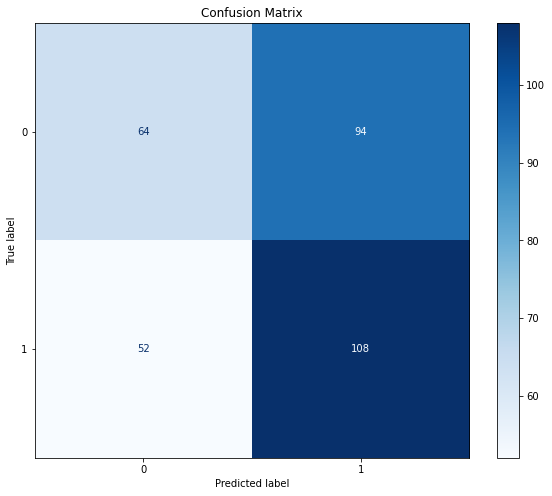

In [93]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10,8))
plot_confusion_matrix(clf_type1, ModelX_test, Modely_test, ax=ax, cmap='Blues', values_format='.4g')
plt.title('Confusion Matrix')
plt.grid(False)

In [47]:
# Hyper parameter optimization
param_grid = {'criterion': ['gini','entropy','log_loss'],
              'max_depth': [2,3,4,5,6],
              'min_samples_leaf': [5,10,20,30,50,75],
              'min_samples_split': [25,50,100,150]}

In [51]:
# perform Grid search
gs = GridSearchCV(clf_type1, param_grid)
gs.fit(ModelX_train, Modely_train)

# best parameters
gs.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'min_samples_leaf': 30,
 'min_samples_split': 25}

In [52]:
gs.best_score_

0.5060584074006893

In [73]:
# Cross-validation
tscv = TimeSeriesSplit(n_splits=5)


# perform random search
rs = RandomizedSearchCV(clf_type1, param_grid, n_iter=500, scoring='f1', cv=tscv)
rs.fit(ModelX_train, Modely_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=DecisionTreeClassifier(max_depth=5,
                                                    min_samples_leaf=5,
                                                    min_samples_split=50),
                   n_iter=500,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6],
                                        'min_samples_leaf': [5, 10, 20, 30, 50,
                                                             75],
                                        'min_samples_split': [25, 50, 100,
                                                              150]},
                   scoring='f1')

In [100]:
rs.best_params_

{'min_samples_split': 25,
 'min_samples_leaf': 20,
 'max_depth': 6,
 'criterion': 'entropy'}

In [101]:
rs.best_score_

0.4263418672961759